<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/%5BDeep_Learning%5D_Model_Perf_Improving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 성능 향상

와인 종류 예측 모델 만들기

In [4]:
# 데이터 불러오기
import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

df

fatal: destination path 'data' already exists and is not an empty directory.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


- 12 : 1 - 레드 와인, 0 - 화이트 화인

In [5]:
# 데이터 세팅
X = df.iloc[:, :12]
y = df.iloc[:, 12]

검증 데이터셋 추가<br>

테스트셋 : 학습이 끝난 모델을 테스트해보는 용도<br>
검증셋 : 최적의 학습 파라미터를 찾기 위해 학습 과정에서 사용하는 용도


In [6]:
# 와인 종류 예측 모델
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # validation_split : 검증셋을 만드는 옵션으로 학습데이터의 25%를 검증셋으로 설정

score = model.evaluate(X_test, y_test)
print('Test acc :', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 28ms/step - loss: 21.7431 - accuracy: 0.2530 - val_loss: 16.1738 - val_accuracy: 0.2431
Epoch 2/50
8/8 [=

## 모델 업데이트

가장 최적의 학습이 이루어진 epoch의 모델 저장하기

In [7]:
# 에포크마다 모델의 정확도를 함께 기록하며 저장
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
# 40번째 에포크의 검증셋 정확도가 0.9346이라면 40-0.9346.hdf5라는 이름으로 저장

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1) # MdoelCheckpoit() : 학습 중인 모델을 저장하는 함수

In [12]:
# 모델 재훈련
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25,
                    verbose=0, callbacks=[checkpointer]) # verbose = 0 : 학습 과정 출력 생략 / callbacks에 checkpointer를 넣어야 저장됨

score = model.evaluate(X_test, y_test)
print('Test acc :', score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                390       
                                                                 
 dense_17 (Dense)            (None, 12)                372       
                                                                 
 dense_18 (Dense)            (None, 8)                 104       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1: saving model to ./data/model/all/01-0.8100.hdf5

Epoch 2: saving model to ./data/model/all/02-0.8908.hdf5

Epoch 3: saving model to ./data/model/a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: saving model to ./data/model/all/05-0.9208.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9200.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9231.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9162.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9231.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9208.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9192.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9223.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9223.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9208.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9223.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9223.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9223.hdf5

Epoch 18: saving model to ./data/model/all/18-0.9223.hdf5

Epoch 19: saving model to ./data/model/all/19-0.9215.hdf5

Epoch 20: saving model to ./data/model/all/20-0.9215.hdf5

Epoch 21: saving model to ./data/model/all/21-0.9208.hdf5

E

## 과적합 확인

학습을 너무 적게 하면 데이터셋의 패턴을 충분히 파악하지 못하고,<br>
그렇다고 너무 많이 학습하면 과적합을 야기한다.

적절한 학습 횟수를 정하기 위해 검증셋과 테스트셋의 결과를 그래프로 그려보자.

In [14]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1476 - accuracy: 0.9497 - val_loss: 0.1831 - val_accuracy: 0.9285
Epoch 2/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1493 - accuracy: 0.9502 - val_loss: 0.1770 - val_accuracy: 0.9300
Epoch 3/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1461 - accuracy: 0.9507 - val_loss: 0.1752 - val_accuracy: 0.9315
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1454 - accuracy: 0.9505 - val_loss: 0.1739 - val_accuracy: 0.9315
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1463 - accuracy: 0.9494 - val_loss: 0.1722 - val_accuracy: 0.9338
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1441 - accuracy: 0.9515 - val_loss: 0.1725 - val_accuracy: 0.9315
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1425 - accuracy: 0.9510 - val_loss: 0.1736 - val_accuracy: 0.9300
Epoch 8/2000
8/8 [

- history : model.fit()의 결과를 가진 파이썬 객체
- history.params : model.fit()의 설정 값 포함
- history.epoch : 에포크 정보 포함
- history.history : loss, accuracy, val_loss, val_accuracy 포함

In [16]:
# history 객체 데이터프레임화
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.147611,0.949705,0.183080,0.928462
1,0.149282,0.950218,0.177039,0.930000
2,0.146140,0.950731,0.175249,0.931538
3,0.145445,0.950475,0.173902,0.931538
4,0.146254,0.949448,0.172196,0.933846
...,...,...,...,...
1995,0.032364,0.990762,0.052843,0.986154
1996,0.029959,0.992302,0.052118,0.984615
1997,0.031825,0.991275,0.054968,0.986154
1998,0.031329,0.991789,0.062044,0.980769


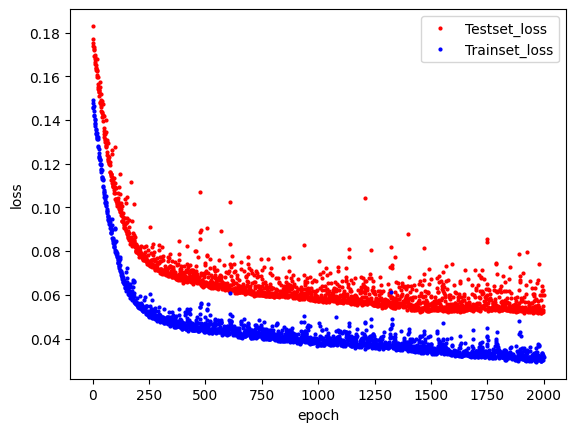

In [17]:
# 학습셋 검증셋 오차 그래프화
import numpy as np
import matplotlib.pyplot as plt

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 학습 자동 중단

검증셋 오차가 커지기 전에 학습을 자동으로 중단하고, 그 때의 모델을 저장해보자.

In [18]:
# EarlyStopping() : 학습이 진행되어도 테스트셋 오차가 줄어들지 않으면 학습을 자동으로 멈추게 하는 함수
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20) # 검증셋 오차가 20번 이상 낮아지지 않을 경우 학습 종료
# monitor : model.fit() 실행 결과 중 어떤 것을 이용할지 지정
# patience : 지정된 값이 몇 번 이상 향상되지 않으면 학습을 종료시킬지 지정

In [19]:
# ModelCehckpoint() 함수와 함께 사용하여 가장 최적의 모델만 저장
modelpath = './data/model/best/bestmodel.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True) # save_best_only : 가장 최적의 모델 하나만 저장하는 옵션

In [21]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0311 - accuracy: 0.9926 - val_loss: 0.0515 - val_accuracy: 0.9838
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0316 - accuracy: 0.9910 - val_loss: 0.0514 - val_accuracy: 0.9869
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0302 - accuracy: 0.9910 - val_loss: 0.0574 - val_accuracy: 0.9846
Epoch 4/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9915 - val_loss: 0.0584 - val_accuracy: 0.9846
Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.0571 - val_accuracy: 0.9854


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 6/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.9915 - val_loss: 0.0526 - val_accuracy: 0.9854
Epoch 7/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0333 - accuracy: 0.9908 - val_loss: 0.0553 - val_accuracy: 0.9846
Epoch 8/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.9915 - val_loss: 0.0527 - val_accuracy: 0.9823
Epoch 9/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0305 - accuracy: 0.9915 - val_loss: 0.0574 - val_accuracy: 0.9846
Epoch 10/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 0.9915 - val_loss: 0.0589 - val_accuracy: 0.9823
Epoch 11/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.0517 - val_accuracy: 0.9862
Epoch 12/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9918 - val_loss: 0.0521 - val_accuracy: 0.9854
Epoch 13/2000
8/8

In [22]:
# 모델 성능 평가
score = model.evaluate(X_test, y_test)
print('Test acc :', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9862
Test acc : 0.9861538410186768


맨 처음 모델의 정확도에 비해 많이 향상된 것을 볼 수 있다.